In [15]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
#from splane import pzmap, grpDelay, bodePlot
import numpy as np


## Ejercicio 1)
Planteo de modelo de estados y obtengo matrices A,B,C,D.<br>

En el motor:
$$Ea_{(S)} = Ia_{(S)}*R_a + S*L_a*Ia_{(S)} + Eb_{(S)}$$
$$Eb_{(S)}=K_b * \Omega_m{(S)} = S*K_b * \Theta_m(S)$$
$$T_m(S)=K_t*I_a(S)$$
$$T_m(S)=S^2*J*\Theta_m(S)+S*B*\Theta_m(S)$$
$$T_m(S)=S*(S*J+B)*\Theta_m(S)$$
En el sistema de control:
$$Vr_(S)=K_{p1}*\theta_r(S)$$
$$Vfb_(S)=K_{p2}*\theta_l(S)$$
$$Ea_{(S)}= [V_{r(S)}-V_{fb(S)}]*A$$
de aqui que:
$$\frac{\theta_l(S)}{\theta_r(S)}=\frac{A*K_{p1}*K_t}{S^3*J*L_a + S^2(J*Ra+B*La)+S*(B*Ra+K_t*K_b)+A*K_{p2}*K_t}$$
Utilizando el metodo:
$$\frac{Y_{(S)}}{U_{(S)}}=\frac{a_2*S^{2}+a_1*S+a_0}{S^3 +b_2*S^2+b_1*S+b_0}$$
Multiplico arriba y abajo por $X_{(S)}*S^{-n}$ siendo $n$ el mayor grado
$$\frac{Y_{(S)}}{U_{(S)}}=\frac{(a_2*S^{-1}+a_1*S^{-2}+a_0*S^{-3})*X_{(S)}}{(1+ b_2*S^{-1}+b_1*S^{-2}+b_0*S^{-3})*X_{(S)}}$$
Igualo num con num y den con den:
$$Y_{(S)}=(a_2*S^{-1}+a_1*S^{-2}+a_0*S^{-3})*X_{(S)}$$
$$U_{(S)}=(1+ b_2*S^{-1}+b_1*S^{-2}+b_0*S^{-3})*X_{(S)}$$
esta ultima le doy una forma un poco mas linda:
$$X_{(S)}=U_{(S)} - (b_2*S^{-1}+b_1*S^{-2}+b_0*S^{-3})*X_{(S)}$$
De aqui por inspeccion:
\begin{equation}
\begin{bmatrix}
x^{'1}\\
x^{'2}\\
x^{'3}\\
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & -b_0\\
1 & 0 & -b_1\\
0 & 1 & -b_2\\
\end{bmatrix}
*
\begin{bmatrix}
x^{1}\\
x^{2}\\
x^{3}\\
\end{bmatrix}
+
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
\end{bmatrix}
*u
\end{equation}

\begin{equation}
y=
\begin{bmatrix}
0 & 0 & a_0\\
\end{bmatrix}
*
\begin{bmatrix}
x^{1}\\
x^{2}\\
x^{3}\\
\end{bmatrix}
+
\begin{bmatrix}
0\\
\end{bmatrix}
*u
\end{equation}

In [16]:
S = symbols('S')
b0,b1,b2,a0,a1,a2=symbols('b0,b1,b2,a0,a1,a2')
####Declaro las matrices
A=Matrix(([0,0,-b0],
          [1,0,-b1],
          [0,1,-b2]))
B=Matrix(([a0],
          [a1],
          [a2]))
C=Matrix(([0,0,1],))
D=Matrix(([0],))
####Inspeccion visual de las matrices
print("A=")
pprint(A)
print("B=")
pprint(B)
print("C=")
pprint(C)
print("D=")
pprint(D)
###Trabajo las matrices para conseguir tf
aux=S*np.identity(3) - A
auxinv= aux.inv('ADJ')
### Verificacion del trabajo intermedio, medio innecesario
#print("aux=")
#pprint(aux)
#print("aux inv=")
#pprint(auxinv)
#### Finalmente obtengo Tf
tf=C * auxinv * B + D
print("tf=")
pprint(tf[0])

A=
⎡0  0  -b₀⎤
⎢         ⎥
⎢1  0  -b₁⎥
⎢         ⎥
⎣0  1  -b₂⎦
B=
⎡a₀⎤
⎢  ⎥
⎢a₁⎥
⎢  ⎥
⎣a₂⎦
C=
[0  0  1]
D=
[0]
tf=
                 2                                                            
            1.0⋅S ⋅a₂                             1.0⋅S⋅a₁                    
────────────────────────────────── + ────────────────────────────────── + ────
     3        2                           3        2                          
1.0⋅S  + 1.0⋅S ⋅b₂ + 1.0⋅S⋅b₁ + b₀   1.0⋅S  + 1.0⋅S ⋅b₂ + 1.0⋅S⋅b₁ + b₀   1.0⋅

                              
            a₀                
──────────────────────────────
 3        2                   
S  + 1.0⋅S ⋅b₂ + 1.0⋅S⋅b₁ + b₀


## Ejercicio 2)
## a) 
$$n_{(t)}=0;$$
$$G_{c(S)}=6;$$
$$G_{(S)}=\frac{4}{(S+2)*(S+6)}$$
Al producto entre ambos para este inciso lo llamo $H_{(S)}=G_{c(S)}*G_{(S)}$<br>
entonces el error:
$$E_{(S)}=R_{(S)}*\frac{1}{1+H_{(S)}}$$
y propongo $R_{(S)}=\frac{1}{S}$<br>
resultando:<br>
$$E_{(S)}=\frac{(S+2)*(S+6)}{S*((S+2)(S+6)+24)}$$

In [17]:
print("Verificacion del calculo de E")
H_s=6*(4)/((S+2)*(S+6))
E=1/(S*(1+H_s))
pprint(simplify(E))
print("Calculo el e(inf) para obtener un valor que creo es lo que pide:")
###Aplico teorema del valor final
expr = Limit(S*E, S, 0)
print("e(inf)=")
pprint(expr)
print("Calculando e(inf)=")
pprint(expr.doit())


Verificacion del calculo de E
    (S + 2)⋅(S + 6)     
────────────────────────
S⋅((S + 2)⋅(S + 6) + 24)
Calculo el e(inf) para obtener un valor que creo es lo que pide:
e(inf)=
              1         
 lim ───────────────────
S─→0⁺           24      
     1 + ───────────────
         (S + 2)⋅(S + 6)
Calculando e(inf)=
1/3


## b) 
$$n_{(t)}=1/S$$
$$G_{c(S)}=6;$$
$$G_{(S)}=\frac{4}{(S+2)*(S+6)}$$
Al producto entre ambos para este inciso lo llamo $J_{(S)}=G_{c(S)}*G_{(S)}$<br>
entonces el error con $n_{(t)}$ pasivada sigue siendo:
$$E_{(S)}=R_{(S)}*\frac{1}{1+J_{(S)}}$$
y propongo $R_{(S)}=\frac{1}{S}$<br>
resultando:<br>
$$E1_{(S)}=\frac{(S+2)*(S+6)}{S*((S+2)(S+6)+24)}$$
ahora reviso el error para $n_{(t)}$ pasivando $R_{(S)}$<br>
$$E2_{(S)}=n_{(S)}*G^*_{(S)}$$
Siendo 
$$G^*_{(S)}=\frac{G_{(S)}}{1+G_{(S)}*H_{(S)}}$$
Y
$$H_{(S)}=G_{c(S)}$$
Resultando este $$E2_{(S)}=\frac{4}{S \left(1 + \frac{24}{\left(S + 2\right) \left(S + 6\right)}\right) \left(S + 2\right) \left(S + 6\right)}$$
$$E2_{(S)}=\frac{4}{S \left(\left(S + 2\right) \left(S + 6\right) + 24\right)}$$
Y el total entiendo que es la suma de ambos
$$e(\infty)=\lim_{S \to 0} S*(E1_{(S)}+E2_{(S)})$$

In [18]:
H_1=6
G=4/((S+2)*(S+6))
print("G*=")
G_asterisco=G/(1+G*H_1)
pprint(simplify(G_asterisco))
print("E=")
E=G_asterisco

pprint(simplify(E))
expr = Limit(E, S, 0)
print("C/N=")
pprint(expr)
print("La salida vale=")
pprint(expr.doit())

G*=
         4          
────────────────────
(S + 2)⋅(S + 6) + 24
E=
         4          
────────────────────
(S + 2)⋅(S + 6) + 24
C/N=
     ⎛                  4                  ⎞
 lim ⎜─────────────────────────────────────⎟
S─→0⁺⎜⎛           24      ⎞                ⎟
     ⎜⎜1 + ───────────────⎟⋅(S + 2)⋅(S + 6)⎟
     ⎝⎝    (S + 2)⋅(S + 6)⎠                ⎠
La salida vale=
1/9


## c)
Ahora
$$G_{c(S)}=\frac{Num}{den};$$
y busco que 
$$\lim_{S \to 0} S*E2_{(S)}=0$$
para que el error vuelva a dar lo mismo que en a)<br>
Para esto:
$$S*E2_{(S)}=S*\frac{(S+2)*(S+6)+20}{S*(S+2)(S+6)+24)}$$


In [19]:
NUM,DEN=symbols('NUM,DEN')
H_1=NUM/DEN
G=4/((S+2)*(S+6))
print("TF, C/N=")
G_asterisco=G/(1+G*H_1)
pprint(simplify(G_asterisco))



#####
print("Sustituyo NUM=1 DEN=S")
Expr_susti=G_asterisco.subs([(NUM,9),(DEN,1)])
print("TF sustituida=")
pprint(simplify(Expr_susti))
print("Calculando valor final=")
ALGO = Limit(Expr_susti, S, 0)
pprint(ALGO.doit())
##print(latex(expr))

print("Verificacion del calculo de E")
H_s=9*(4)/((S+2)*(S+6))
E=1/(S*(1+H_s))
pprint(simplify(E))
print("Calculo el e(inf) para obtener un valor que creo es lo que pide:")
###Aplico teorema del valor final
expr = Limit(S*E, S, 0)
print("e(inf)=")
pprint(expr)
print("Calculando e(inf)=")
pprint(expr.doit())

TF, C/N=
           4⋅DEN           
───────────────────────────
DEN⋅(S + 2)⋅(S + 6) + 4⋅NUM
Sustituyo NUM=1 DEN=S
TF sustituida=
         4          
────────────────────
(S + 2)⋅(S + 6) + 36
Calculando valor final=
1/12
Verificacion del calculo de E
    (S + 2)⋅(S + 6)     
────────────────────────
S⋅((S + 2)⋅(S + 6) + 36)
Calculo el e(inf) para obtener un valor que creo es lo que pide:
e(inf)=
              1         
 lim ───────────────────
S─→0⁺           36      
     1 + ───────────────
         (S + 2)⋅(S + 6)
Calculando e(inf)=
1/4


# Ejercicio 3)
Sabemos que las graficas de las consignas son respuestas al escalon asique vamos a verificar que son...<br>
Si tenes practica las sacas a ojo pero no me cuesta nada demostrar...

Medidor:
Controlador:
Actuador:


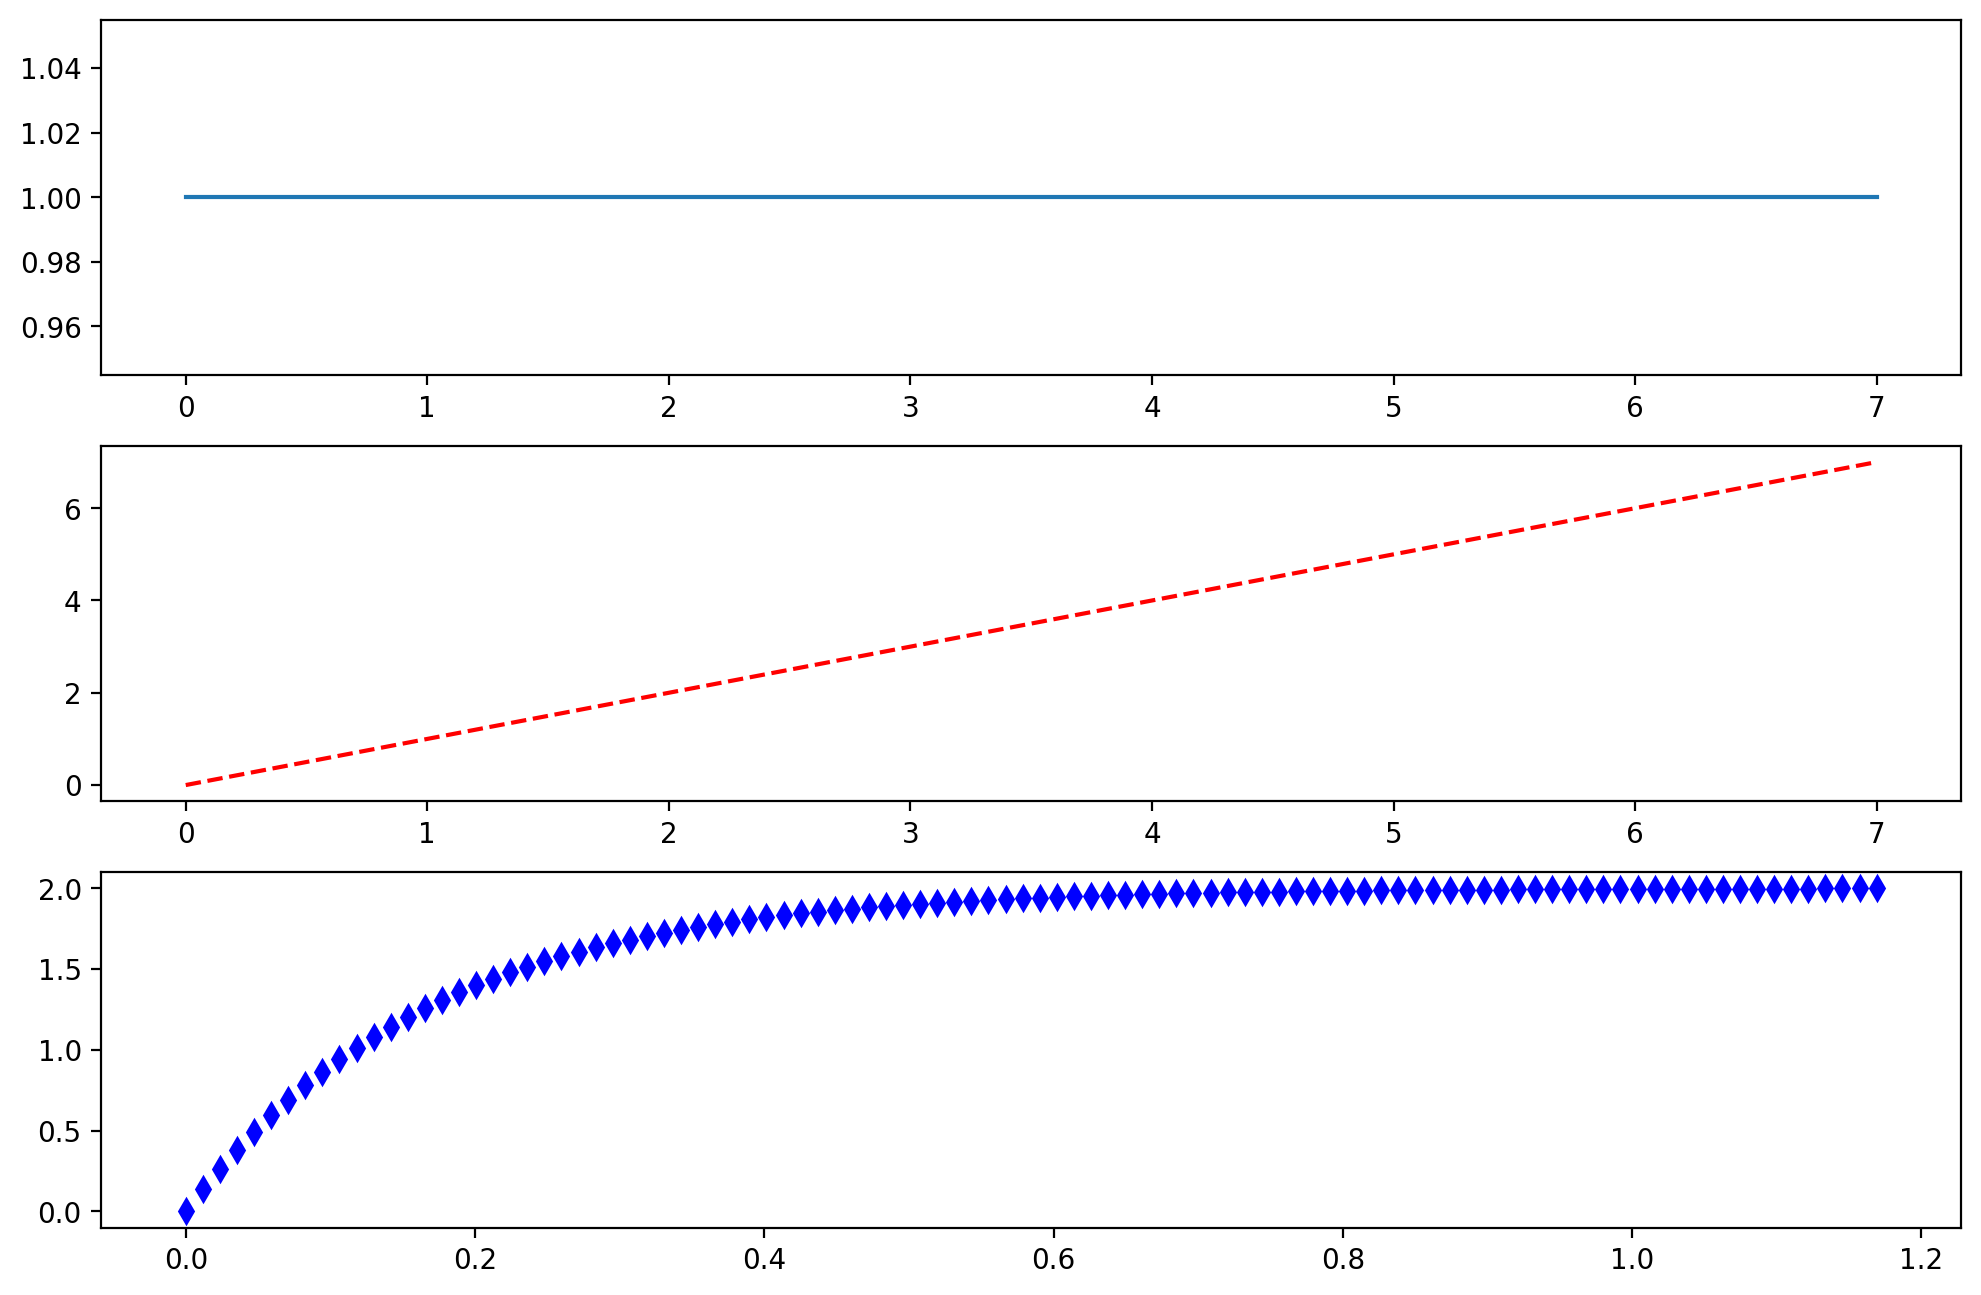

Paso la tf al tiempo
TF[0]=


2.0*exp(-5.98802395209581*t)*Heaviside(t)

In [27]:

###MEDIDOR

num_med=[1]
den_med=[1]
system_med=signal.TransferFunction(num_med,den_med)
t_med, y_med = signal.step(system_med)

#####Controlador

num_cont=[1]
den_cont=[1,0]
system_cont=signal.TransferFunction(num_cont,den_cont)
t_cont, y_cont = signal.step(system_cont)


####Actuador
num_act=[2/0.167]
den_act=[1,1/0.167]
system_act=signal.TransferFunction(num_act,den_act)
t_act, y_act = signal.step(system_act)
##print(t_act)

print("Medidor:")
##plt.figure()
plt.figure(figsize=(12,8), dpi= 200)
plt.subplot(311)
plt.plot(t_med, y_med)
print("Controlador:")
plt.subplot(312)
plt.plot(t_cont, y_cont, 'r--')
print("Actuador:")
plt.subplot(313)
plt.plot(t_act, y_act, 'bd')
plt.show()
print("Paso la tf al tiempo")
t = symbols('t')
expression = (2*0.167)/(S*0.167+1)
print("TF[0]=")
inverse_laplace_transform(expression, S, t)

Para la planta hacemos:
$$\frac{1}{\left(S + 2 - 2 i\right) \left(S + 2 + 2 i\right)}$$
Que equivale a:
$$\frac{1}{S^{2} + 4 S + 8}$$
Entonces el diagrama de bloques queda:
<img src="./Capture1.PNG" align="center" width="80%" />
Y la TF de eso:
$$T_{f(S)}=\frac{12}{S^4+10*S^3+32*S^2+48*S+15,96}$$

## Ejercicio 4)
la tf es:
$$T_{f(S)}\frac{36*p}{S^{3} + S^{2} p + 6 S^{2} + 6 S p + 34 S + 34 p}$$

S^{3} + S^{2} t + 6 S^{2} + 6 S t + 34 S + 34 t


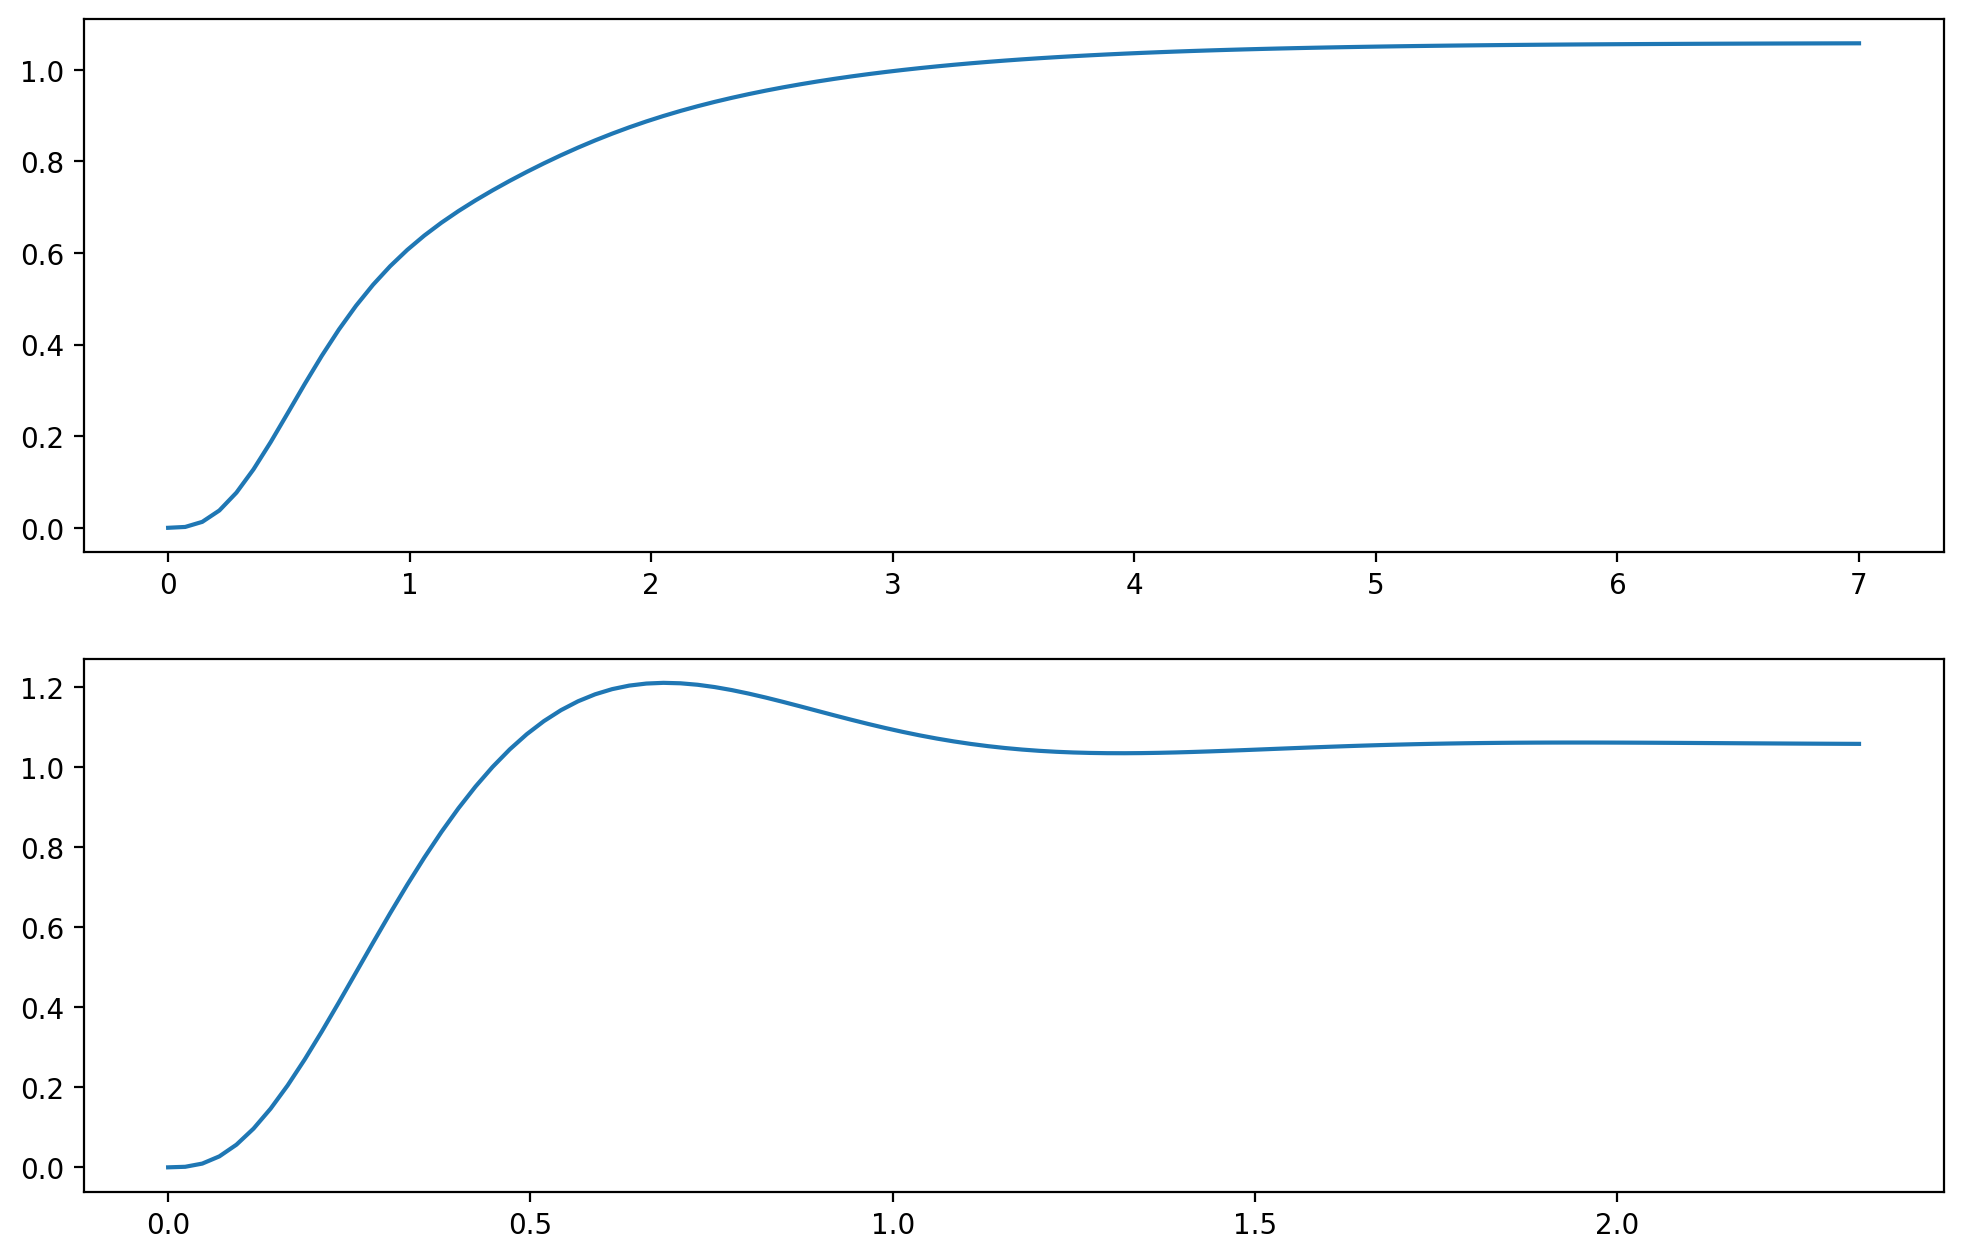

In [21]:
###SISTEMA con p=1
a=expand((S**2 +6*S+34)*(S+t))
pprint(latex(a))
p=1
num_1=[36*p]
den_1=[1,p+6,6*p+34,34*p]
system_1=signal.TransferFunction(num_1,den_1)
t_1, y_1 = signal.step(system_1)


p=20
num_2=[36*p]
den_2=[1,p+6,6*p+34,34*p]
system_2=signal.TransferFunction(num_2,den_2)
t_2, y_2 = signal.step(system_2)


plt.figure(figsize=(12,12), dpi= 200)
plt.subplot(311)
plt.plot(t_1,y_1)
plt.subplot(312)
plt.plot(t_2,y_2)
